In [20]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as se

df = pd.read_csv('fifa_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 90 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  object 
 14  Prefer

In [4]:
"""1.Which country has the most number of players."""


count = df.groupby("Nationality")["Name"].count().reset_index().nlargest(5, "Name")

count

,Nationality,Name
46,England,1662
59,Germany,1198
139,Spain,1072
6,Argentina,937
55,France,914


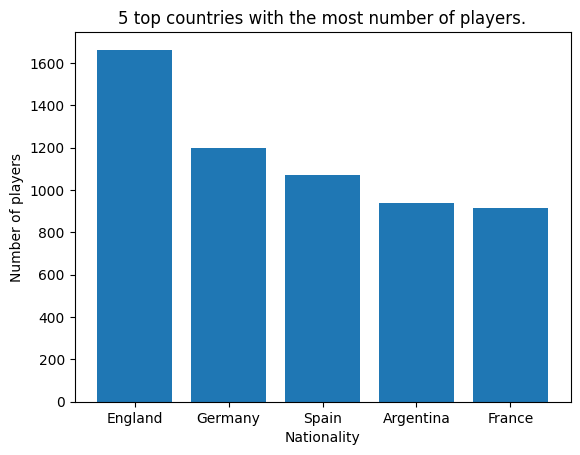

In [5]:
"""2.Plot a bar chart of 5 top countries with the most number of players."""

x = count["Nationality"]
y = count["Name"]

# Title and labels
plt.title("5 top countries with the most number of players.")
plt.xlabel("Nationality")
plt.ylabel("Number of players")
plt.bar(x, y)
plt.show()

In [80]:
"""3.Which player has the highest salary?"""

for x in df.index:
    df.loc[x, "Wage"] = int(df.loc[x, "Wage"].replace("€", "").replace("K", ""))

df["Wage"] = df["Wage"].astype(int)

salary = df.nlargest(1, "Wage").filter(items=["Name", "Wage"])
salary

,Name,Wage
0,L. Messi,565


0-100 :  18019
100-200 :  143
200-300 :  31
300-400 :  10
400-500 :  3
Above 500 :  1


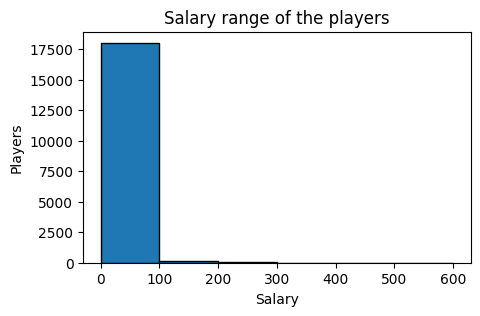

In [67]:
"""4.Plot a histogram to get the salary range of the players."""

print("0-100 : ", len(df.query("Wage >= 0 & Wage < 100")))
print("100-200 : ", len(df.query("Wage >= 100 & Wage < 200")))
print("200-300 : ", len(df.query("Wage >= 200 & Wage < 300")))
print("300-400 : ", len(df.query("Wage >= 300 & Wage < 400")))
print("400-500 : ", len(df.query("Wage >= 400 & Wage < 500")))
print("Above 500 : ", len(df.query("Wage > 500")))

plt.figure(figsize=(5, 3))
plt.hist(x, bins=[0, 100, 200, 300, 400, 500, 600], edgecolor="black")

plt.title("Salary range of the players")
plt.xlabel("Salary")
plt.ylabel("Players")
plt.show()



In [84]:
"""5.Who is the tallest player in the fifa? """

height = df.sort_values(by="Height", ascending=False).head()

height = height.filter(items=["Name", "Height"])

height

,Name,Height
11614,T. Holý,6'9
17927,D. Hodzic,6'9
11903,K. Scherpen,6'8
17694,M. Casey,6'8
4189,V. Milinković-Savić,6'8


In [89]:
"""6.Which club has the most number of players?"""

df["Club"].value_counts().head(30)


Club
FC Barcelona               33
Valencia CF                33
Fortuna Düsseldorf         33
Cardiff City               33
Rayo Vallecano             33
CD Leganés                 33
Frosinone                  33
Newcastle United           33
Southampton                33
Burnley                    33
Eintracht Frankfurt        33
Wolverhampton Wanderers    33
TSG 1899 Hoffenheim        33
Everton                    33
AS Monaco                  33
RC Celta                   33
Empoli                     33
Manchester City            33
Manchester United          33
Borussia Dortmund          33
Real Madrid                33
Atlético Madrid            33
Tottenham Hotspur          33
Chelsea                    33
Liverpool                  33
Arsenal                    33
Levante UD                 32
VfL Wolfsburg              32
FC Nantes                  32
Fulham                     32
Name: count, dtype: int64

In [91]:
"""7.Which foot is most preferred by the players?Draw a bar chart for preferred foot"""

foot = df.groupby("Preferred Foot")["Name"].count().reset_index().nlargest(5, "Name")

foot

,Preferred Foot,Name
1,Right,13948
0,Left,4211


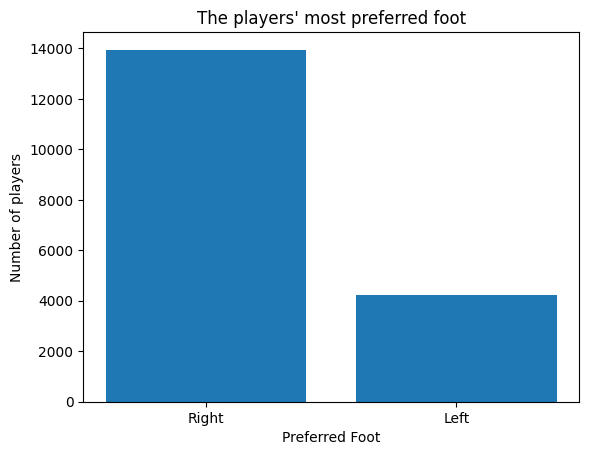

In [95]:
x = foot["Preferred Foot"]
y = foot["Name"]

plt.title("The players' most preferred foot")
plt.xlabel("Preferred Foot")
plt.ylabel("Number of players")
plt.bar(x, y)
plt.show()